# Imports

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# DATA FILES

In [11]:
train = pd.read_csv("C:/Users/HP/Desktop/jobathon feb/train_PDjVQMB.csv")
test = pd.read_csv("C:/Users/HP/Desktop/jobathon feb/test_lTY72QC.csv")

# DATA OVER VIEW

In [12]:
train.head(2)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0


In [13]:
test.head(2)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average


Looking at ony train data....

In [14]:
train.describe(include=object)

,ID,Gender,Income,Product_Holdings,Credit_Category
count,6650,6650,6650,6650,6650
unique,6650,2,4,3,3
top,56b5180d,Male,10L - 15L,1,Poor
freq,1,3612,1885,3200,3076


In [15]:
train.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
ID                    6650 non-null object
Age                   6650 non-null int64
Gender                6650 non-null object
Income                6650 non-null object
Balance               6650 non-null float64
Vintage               6650 non-null int64
Transaction_Status    6650 non-null int64
Product_Holdings      6650 non-null object
Credit_Card           6650 non-null int64
Credit_Category       6650 non-null object
Is_Churn              6650 non-null int64
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [17]:
train.duplicated().sum()

0

There is no null value or duplicated data in the dataset... 
there are 6 numerical columns out of which 2 are continuous and 5 non numerical columns.


# EDA

In [19]:
train.nunique()

ID                    6650
Age                     52
Gender                   2
Income                   4
Balance               6643
Vintage                  6
Transaction_Status       2
Product_Holdings         3
Credit_Card              2
Credit_Category          3
Is_Churn                 2
dtype: int64

# UNIVARIATE ANALYSIS

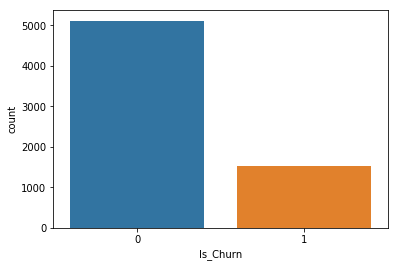

In [20]:
######## Target Variable########

sns.countplot(x="Is_Churn", data=train)
#### Data appears to be imbalances, for modeling, we will have to do balancing

In [22]:
###### Independent Vriables
####Categorical Data#####

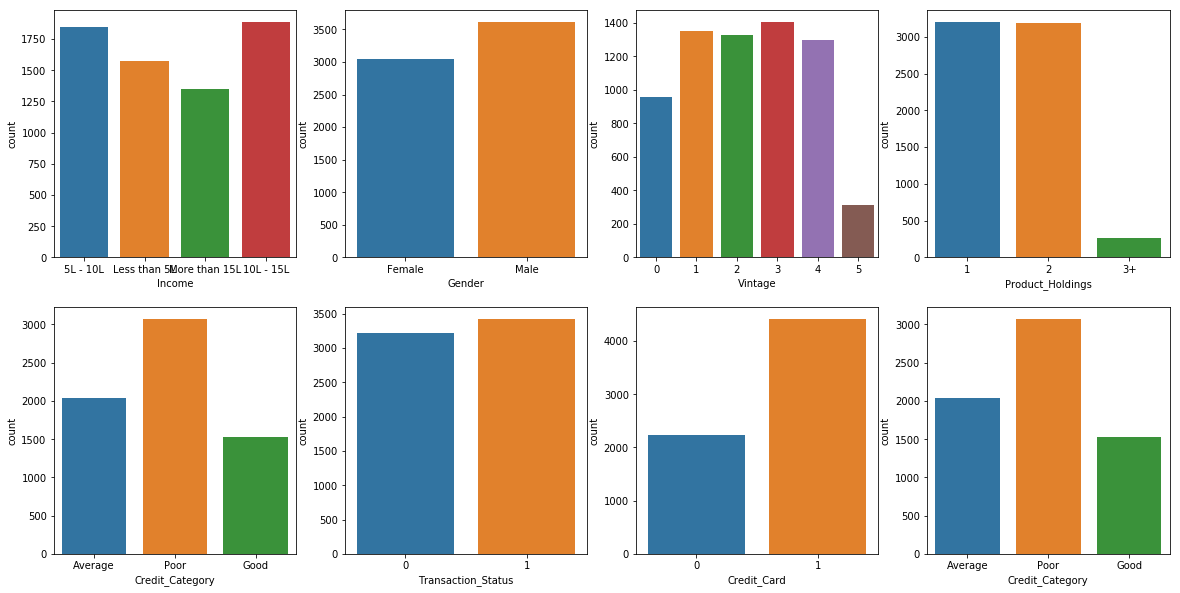

In [23]:
fig, axs = plt.subplots(ncols=4,nrows= 2 ,figsize=(20,10))
sns.countplot(x='Income',data = train, ax= axs[0][0])
sns.countplot(x='Gender',data = train,  ax= axs[0][1])
sns.countplot(x='Vintage',data = train, ax= axs[0][2])
sns.countplot(x ='Product_Holdings',data = train, ax= axs[0][3])
sns.countplot(x ='Credit_Category',data = train, ax= axs[1][0])
sns.countplot(x ='Transaction_Status',data = train, ax= axs[1][1])
sns.countplot(x ='Credit_Card',data = train, ax= axs[1][2])
sns.countplot(x ='Credit_Category',data = train, ax= axs[1][3])

##### we are not plotting age, as bimmimg needs to be done there... 

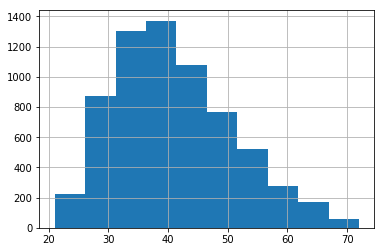

In [90]:
train.Age.hist()

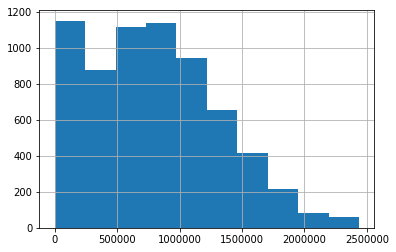

In [25]:
train.Balance.hist()

A lot of customers has 0 balance also. 

# Bivariate Analysis

In [26]:
####### Between Independent Variables

In [96]:
train.corrwith(test)

Age                   0.026157
Balance              -0.013018
Vintage               0.012944
Transaction_Status    0.008796
Credit_Card           0.043417
Is_Churn                   NaN
dtype: float64

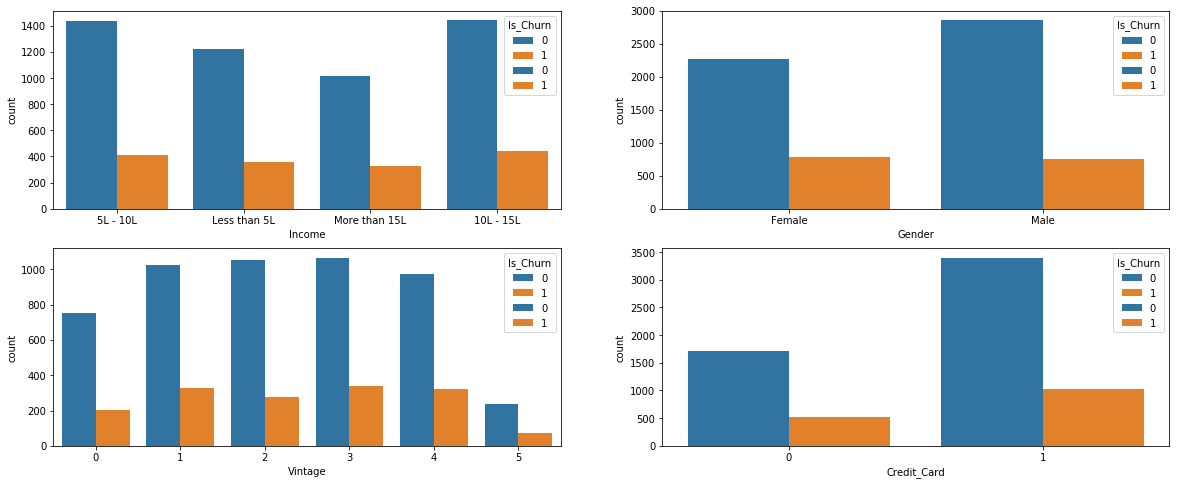

In [27]:
########## With Dependent Varible########
fig, axarr = plt.subplots(2, 2, figsize=(20, 8))
sns.countplot(x='Income', hue = 'Is_Churn',data = train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Is_Churn',data = train, ax=axarr[0][1])
sns.countplot(x='Vintage', hue = 'Is_Churn',data = train, ax=axarr[1][0])
sns.countplot(x='Credit_Card', hue = 'Is_Churn',data = train, ax=axarr[1][1])
sns.countplot(x='Income', hue = 'Is_Churn',data = train, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Is_Churn',data = train, ax=axarr[0][1])
sns.countplot(x='Vintage', hue = 'Is_Churn',data = train, ax=axarr[1][0])
sns.countplot(x='Credit_Card', hue = 'Is_Churn',data = train, ax=axarr[1][1])

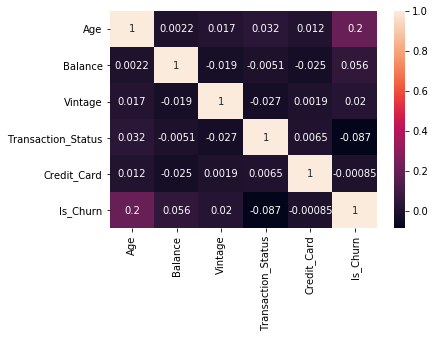

In [29]:
sns.heatmap(train.corr(),annot=True)

# FEATURE ENGINEERING

In [30]:
##### GENDER######
train["Gender"]=np.where(train["Gender"]=="Male",1,0)
# 1 for male and 0 for female

In [31]:
train2=pd.get_dummies(train,columns=['Income','Credit_Category'],prefix=["Income",'Credit_Cat'],drop_first= True)

In [32]:
train2.head()

,ID,Age,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Is_Churn,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Cat_Good,Credit_Cat_Poor
0,84e2fcc9,36,0,563266.44,4,0,1,0,1,1,0,0,0,0
1,57fea15e,53,0,875572.11,2,1,1,1,0,0,1,0,0,1
2,8df34ef3,35,0,701607.06,2,1,2,0,0,0,0,1,0,1
3,c5c0788b,43,0,1393922.16,0,1,2,1,1,0,0,1,0,1
4,951d69c4,39,0,893146.23,1,1,1,1,1,0,0,1,1,0


In [33]:
train2=train2.drop("ID", axis=1)
#### dropping ID column, because it is not required

In [34]:
train2.loc[train2.Product_Holdings== '3+','Product_Holdings']= 3
##### removing the plus sign in Product holdings

In [35]:
train2['Product_Holdings']=train2['Product_Holdings'].astype(int)
##### Setting the type as int

# Testing Data

Now we have to make same changes in test that we made in train for making the model. 

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
ID                    2851 non-null object
Age                   2851 non-null int64
Gender                2851 non-null object
Income                2851 non-null object
Balance               2851 non-null float64
Vintage               2851 non-null int64
Transaction_Status    2851 non-null int64
Product_Holdings      2851 non-null object
Credit_Card           2851 non-null int64
Credit_Category       2851 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 222.8+ KB


In [38]:
test["Gender"]=np.where(test["Gender"]=="Male",1,0)

In [39]:
test2=pd.get_dummies(test,columns=['Income','Credit_Category'],prefix=["Income",'Credit_Cat'],drop_first= True)

In [40]:
test2=test2.drop("ID", axis=1)

In [41]:
test2.loc[test2.Product_Holdings== '3+','Product_Holdings']= 3

In [42]:
test2['Product_Holdings']=test2['Product_Holdings'].astype(int)

In [43]:
test2.head()
#### all the changes has been rightly made.

,Age,Gender,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Income_5L - 10L,Income_Less than 5L,Income_More than 15L,Credit_Cat_Good,Credit_Cat_Poor
0,50,0,1008636.39,2,1,2,1,0,0,1,0,0
1,36,1,341460.72,2,0,2,1,1,0,0,0,0
2,25,0,439460.10,0,0,2,1,0,0,0,1,0
3,41,1,28581.93,0,1,2,1,0,1,0,0,1
4,48,1,1104540.03,2,1,3,0,0,0,1,1,0


# Model Building

In [45]:
X= train2.drop(["Is_Churn"],axis=1)
Y=train2["Is_Churn"]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_valid,Y_train,Y_valid = train_test_split(X,Y,test_size=0.2,random_state=1011)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model1 = LogisticRegression(random_state=10,solver='liblinear',penalty='l1',class_weight={0:1,1:3.5})

# Model Evaluating

In [51]:
model1.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight={0: 1, 1: 3.5}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=10,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [52]:
model1.score(X_train, Y_train)

0.5907894736842105

In [63]:
y_pred=model1.predict(X_valid)

In [78]:
model1.score(X_valid,Y_valid)

0.5804511278195489

In [79]:
np.mean(y_pred==Y_valid)
####checking manually

0.5804511278195489

In [65]:
model1.coef_

array([[ 5.05076550e-02, -2.38988905e-01,  2.68472819e-07,
         3.31292053e-02, -4.72097172e-01,  5.70994067e-03,
        -5.22430559e-03, -4.60700321e-02,  2.03848935e-02,
         8.60636317e-02, -1.34954773e-01,  5.18545567e-02]])

In [68]:
from sklearn import metrics

In [76]:
metrics.confusion_matrix(Y_valid,y_pred)

array([[592, 461],
       [ 97, 180]], dtype=int64)

# Final Submission

In [131]:
p=model1.predict(test2)

In [132]:
submission1 = pd.read_csv('C:/Users/HP/Desktop/jobathon feb/sample_OoSmYo5.csv')
submission1['Is_Churn'] = p
submission1.to_csv('my_submission_p.csv', index=False)